# Fruit Classification Using Sklearn

we’ll implement several machine learning algorithms in Python using Scikit-learn, the most popular machine learning tool for Python. Using a simple dataset for the task of training a classifier to distinguish between different types of fruits.

### Getting the Necessary Libraries and Data

he fruits dataset was created by [Dr. Iain Murray](https://homepages.inf.ed.ac.uk/imurray2/) from University of Edinburgh. He bought a few dozen oranges, lemons and apples of different varieties, and recorded their measurements in a table. And then the professors at University of Michigan formatted the fruits data slightly and it can be downloaded from [here](https://github.com/susanli2016/Machine-Learning-with-Python/blob/master/fruit_data_with_colors.txt).

In [2]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
fruits = pd.read_table('Fruits.txt')
fruits.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


We have 59 pieces of fruits and 7 features in the dataset:

In [3]:
print(fruits.shape)

(59, 7)


We have four types of fruits in the dataset:

In [4]:
print(fruits['fruit_name'].unique())

['apple' 'mandarin' 'orange' 'lemon']


The data is pretty balanced except mandarin. We will just have to go with it.

In [5]:
print(fruits.groupby('fruit_name').size())

fruit_name
apple       19
lemon       16
mandarin     5
orange      19
dtype: int64


## Visualization

c:\Users\aniru\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


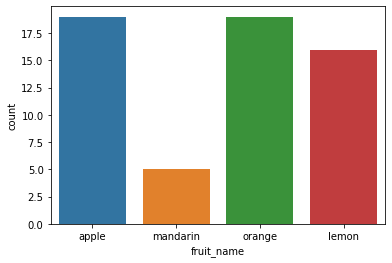

In [6]:
import seaborn as sns

sns.countplot(fruits['fruit_name'], label="count")
plt.show()

1. Box plot for each numeric variable will give us a clearer idea of the distribution of the input variables:

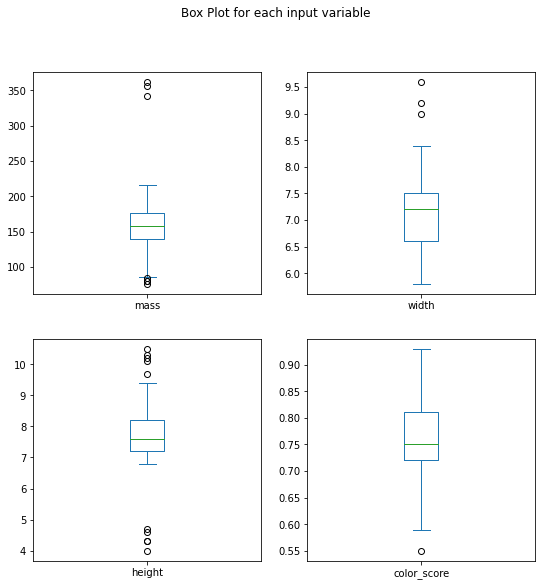

In [7]:
fruits.drop('fruit_label', axis=1).plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False, figsize=(9,9), 
                                        title='Box Plot for each input variable')
plt.savefig('fruits_box')
plt.show()

2. It looks like perhaps color score has a near Gaussian distribution.

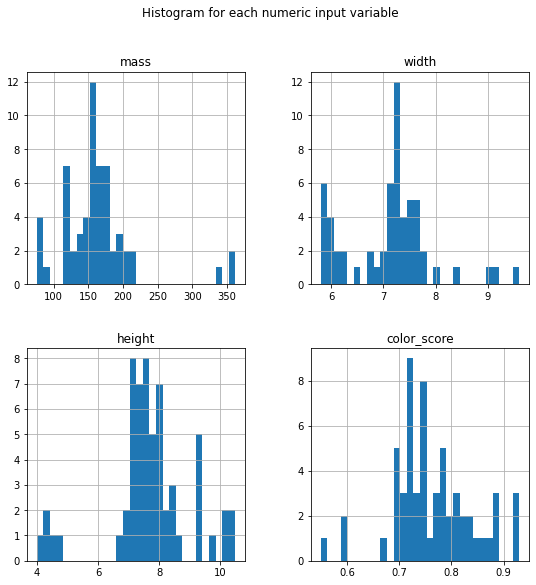

In [8]:
import pylab as pl
fruits.drop('fruit_label', axis=1).hist(bins=30, figsize=(9,9))
plt.suptitle("Histogram for each numeric input variable")
plt.savefig('fruits_hist')
plt.show()

## Create Training and Test Sets and Apply Scaling

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test , y_train , y_test  = train_test_split(X,y, random_state=0)


In [14]:
from sklearn.preprocessing import MinMaxScaler
scaler =  MinMaxScaler()
X_train =  scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

### Logistic Regression

In [15]:
from sklearn.linear_model import LogisticRegression

logreg =  LogisticRegression()
logreg.fit(X_train, y_train)
print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(logreg.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(logreg.score(X_test, y_test)))

Accuracy of Logistic regression classifier on training set: 0.75
Accuracy of Logistic regression classifier on test set: 0.47


### Decision Tree

In [16]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier().fit(X_train, y_train)
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Accuracy of Decision Tree classifier on training set: 1.00
Accuracy of Decision Tree classifier on test set: 0.67


### K-Nearest Neighbors

In [17]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 0.95
Accuracy of K-NN classifier on test set: 0.80


###  Linear Discriminant Analysis

In [18]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
print('Accuracy of LDA classifier on training set: {:.2f}'
     .format(lda.score(X_train, y_train)))
print('Accuracy of LDA classifier on test set: {:.2f}'
     .format(lda.score(X_test, y_test)))

Accuracy of LDA classifier on training set: 0.86
Accuracy of LDA classifier on test set: 0.73


### Gaussian Naive Bayes

In [19]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
print('Accuracy of GNB classifier on training set: {:.2f}'
     .format(gnb.score(X_train, y_train)))
print('Accuracy of GNB classifier on test set: {:.2f}'
     .format(gnb.score(X_test, y_test)))

Accuracy of GNB classifier on training set: 0.86
Accuracy of GNB classifier on test set: 0.47


### Support Vector Machine

In [20]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train, y_train)
print('Accuracy of SVM classifier on training set: {:.2f}'
     .format(svm.score(X_train, y_train)))
print('Accuracy of SVM classifier on test set: {:.2f}'
     .format(svm.score(X_test, y_test)))

Accuracy of SVM classifier on training set: 0.91
Accuracy of SVM classifier on test set: 0.73


The KNN algorithm was the most accurate model that we tried. The confusion matrix provides an indication of no error made on the test set. However, the test set was very small.

In [22]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
pred = knn.predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[4 0 0 0]
 [0 1 0 0]
 [2 0 5 1]
 [0 0 0 2]]
              precision    recall  f1-score   support

           1       0.67      1.00      0.80         4
           2       1.00      1.00      1.00         1
           3       1.00      0.62      0.77         8
           4       0.67      1.00      0.80         2

    accuracy                           0.80        15
   macro avg       0.83      0.91      0.84        15
weighted avg       0.87      0.80      0.80        15



## Plot the Decision Boundary of the K-NN Classifier

([<matplotlib.axis.XTick at 0x1c9785b4a90>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

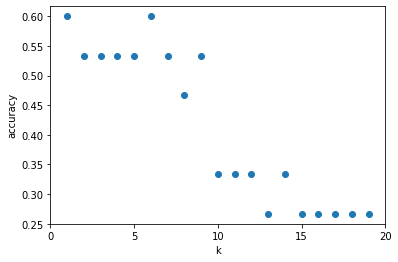

In [28]:
k_range = range(1, 20)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20])